In [1]:
import logging
import os

import matplotlib.pyplot as plt
import numpy as np
from gammapy.data import DataStore

from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig

In [2]:
from asgardpy.base.geom import generate_geom, get_source_position
from asgardpy.base.reduction import (
    generate_dl4_dataset,
    get_bkg_maker,
    get_dataset_maker,
    get_dataset_reference,
    get_exclusion_region_mask,
    get_filtered_observations,
    get_safe_mask_maker,
)
from asgardpy.data.dataset_1d import Dataset1DGeneration
from asgardpy.io.input_dl3 import DL3Files

In [3]:
# os.environ['GAMMAPY_DATA']

In [4]:
log = logging.getLogger("test 1d dataset")

In [5]:
config_file = "../src/asgardpy/tests/config_test_base.yaml"

In [6]:
config = AsgardpyConfig()

In [7]:
%%time
config_main = config.read(config_file)

CPU times: user 26.6 ms, sys: 3.03 ms, total: 29.7 ms
Wall time: 29.6 ms


# Update path of test data

In [8]:
config_main.dataset3d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset3d.instruments[0].input_dl3[1].input_dir = f"{os.environ['GAMMAPY_DATA']}fermipy-crab/"
config_main.dataset1d.instruments[0].input_dl3[0].input_dir = f"{os.environ['GAMMAPY_DATA']}hess-dl3-dr1/"

In [9]:
config_main.general.model_dump()

{'log': {'level': 'info',
  'filename': '',
  'filemode': 'w',
  'format': '',
  'datefmt': ''},
 'outdir': PosixPath('.'),
 'n_jobs': 10,
 'parallel_backend': 'multiprocessing',
 'steps': ['datasets-3d', 'datasets-1d', 'fit', 'flux-points'],
 'overwrite': True,
 'stacked_dataset': True}

# Steps mentioned in the main config file

In [10]:
config_main.general.steps

['datasets-3d', 'datasets-1d', 'fit', 'flux-points']

# Target source information

In [11]:
config_main.target.model_dump()

{'source_name': '4FGL J0534.5+2201i',
 'sky_position': {'frame': 'icrs',
  'lon': <Quantity 83.6338333 deg>,
  'lat': <Quantity 22.0145 deg>,
  'radius': <Quantity 0. deg>},
 'use_uniform_position': True,
 'models_file': PosixPath('.'),
 'datasets_with_fov_bkg_model': [],
 'use_catalog': {'name': '',
  'selection_radius': <Quantity 0. deg>,
  'exclusion_radius': <Quantity 0. deg>},
 'components': [{'name': '4FGL J0534.5+2201i',
   'type': 'SkyModel',
   'datasets_names': [''],
   'spectral': {'type': 'LogParabolaSpectralModel',
    'parameters': [{'name': 'amplitude',
      'value': 1e-07,
      'unit': 'cm-2 s-1 TeV-1',
      'error': 1.5e-08,
      'min': 1e-13,
      'max': 0.0001,
      'frozen': False},
     {'name': 'reference',
      'value': 0.015,
      'unit': 'TeV',
      'error': 0.0,
      'min': 0.0001,
      'max': 100.0,
      'frozen': True},
     {'name': 'alpha',
      'value': 1.7,
      'unit': '',
      'error': 0.05,
      'min': 0.5,
      'max': 3.0,
      'fro

# 1D Datasets informations

In [12]:
config_main.dataset1d.model_dump()

{'type': '1d',
 'instruments': [{'name': 'HESS',
   'input_dl3': [{'type': 'gadf-dl3',
     'input_dir': PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/hess-dl3-dr1'),
     'glob_pattern': {'dl3_files': 'data/hess_*fits.gz'}}],
   'input_dl4': False,
   'dataset_info': {'name': 'HESS',
    'geom': {'wcs': {'skydir': {'frame': 'icrs',
       'lon': <Quantity 0. deg>,
       'lat': <Quantity 0. deg>,
       'radius': <Quantity 0. deg>},
      'binsize': <Quantity 0.02 deg>,
      'proj': 'TAN',
      'map_frame_shape': {'width': <Quantity 6. deg>,
       'height': <Quantity 6. deg>},
      'binsize_irf': <Quantity 0.2 deg>},
     'selection': {'offset_max': <Quantity 2.5 deg>},
     'axes': [{'name': 'energy',
       'axis': {'min': <Quantity 0.1 TeV>,
        'max': <Quantity 100. TeV>,
        'nbins': 5,
        'per_decade': True},
       'axis_custom': {'edges': [], 'unit': 'TeV'}},
      {'name': 'energy_true',
       'axis': {'min': <Quantity 0.1 TeV>,
        'max': <Qu

In [13]:
%%time
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': '', 'filemode': 'w', 'format': '', 'datefmt': ''}


CPU times: user 3.91 ms, sys: 54 μs, total: 3.96 ms
Wall time: 3.01 ms


In [14]:
analysis

# Prepare for a single 1D Dataset, based on instrument

In [15]:
instruments_list = config_main.dataset1d.instruments
print(len(instruments_list), "number of 1D dataset information provided")

config_1d_dataset = instruments_list[0]
print(f"Instrument selected is {config_1d_dataset.name}")

2 number of 1D dataset information provided
Instrument selected is HESS


# Run each Dataset1DGeneration step

In [16]:
%%time
generate_1d_dataset = Dataset1DGeneration(log, config_1d_dataset, config_main)

CPU times: user 44 μs, sys: 0 ns, total: 44 μs
Wall time: 49.4 μs


# Initialized variables

In [17]:
generate_1d_dataset.config_1d_dataset_io

[InputDL3Config(type='gadf-dl3', input_dir=PosixPath('/home/chaitanya/software/gammapy-datasets/1.3/hess-dl3-dr1'), glob_pattern={'dl3_files': 'data/hess_*fits.gz'})]

In [18]:
generate_1d_dataset.config_1d_dataset_info.model_dump()

{'name': 'HESS',
 'geom': {'wcs': {'skydir': {'frame': 'icrs',
    'lon': <Quantity 0. deg>,
    'lat': <Quantity 0. deg>,
    'radius': <Quantity 0. deg>},
   'binsize': <Quantity 0.02 deg>,
   'proj': 'TAN',
   'map_frame_shape': {'width': <Quantity 6. deg>,
    'height': <Quantity 6. deg>},
   'binsize_irf': <Quantity 0.2 deg>},
  'selection': {'offset_max': <Quantity 2.5 deg>},
  'axes': [{'name': 'energy',
    'axis': {'min': <Quantity 0.1 TeV>,
     'max': <Quantity 100. TeV>,
     'nbins': 5,
     'per_decade': True},
    'axis_custom': {'edges': [], 'unit': 'TeV'}},
   {'name': 'energy_true',
    'axis': {'min': <Quantity 0.1 TeV>,
     'max': <Quantity 100. TeV>,
     'nbins': 10,
     'per_decade': True},
    'axis_custom': {'edges': [], 'unit': 'TeV'}}],
  'from_events_file': True,
  'reco_psf': False},
 'observation': {'obs_ids': [23523, 23526],
  'event_type': [],
  'obs_file': PosixPath('.'),
  'obs_time': [],
  'obs_cone': {'frame': 'icrs',
   'lon': <Quantity 0. deg>,
 

In [19]:
generate_1d_dataset.config_target.model_dump()

{'source_name': '4FGL J0534.5+2201i',
 'sky_position': {'frame': 'icrs',
  'lon': <Quantity 83.6338333 deg>,
  'lat': <Quantity 22.0145 deg>,
  'radius': <Quantity 0. deg>},
 'use_uniform_position': True,
 'models_file': PosixPath('.'),
 'datasets_with_fov_bkg_model': [],
 'use_catalog': {'name': '',
  'selection_radius': <Quantity 0. deg>,
  'exclusion_radius': <Quantity 0. deg>},
 'components': [{'name': '4FGL J0534.5+2201i',
   'type': 'SkyModel',
   'datasets_names': [''],
   'spectral': {'type': 'LogParabolaSpectralModel',
    'parameters': [{'name': 'amplitude',
      'value': 1e-07,
      'unit': 'cm-2 s-1 TeV-1',
      'error': 1.5e-08,
      'min': 1e-13,
      'max': 0.0001,
      'frozen': False},
     {'name': 'reference',
      'value': 0.015,
      'unit': 'TeV',
      'error': 0.0,
      'min': 0.0001,
      'max': 100.0,
      'frozen': True},
     {'name': 'alpha',
      'value': 1.7,
      'unit': '',
      'error': 0.05,
      'min': 0.5,
      'max': 3.0,
      'fro

### First check for the given file list if they are readable or not.

In [20]:
%%time
file_list = {}
dl3_info = DL3Files(generate_1d_dataset.config_1d_dataset_io[0], log=generate_1d_dataset.log)

CPU times: user 36 μs, sys: 3 μs, total: 39 μs
Wall time: 45.1 μs


In [21]:
%%time
dl3_info.list_dl3_files()

CPU times: user 17 μs, sys: 0 ns, total: 17 μs
Wall time: 24.6 μs


## Get Observations object

In [22]:
datastore = DataStore.from_dir(generate_1d_dataset.config_1d_dataset_io[0].input_dir)

In [23]:
datastore.obs_table

OBS_ID,RA_PNT,DEC_PNT,GLON_PNT,GLAT_PNT,ZEN_PNT,ALT_PNT,AZ_PNT,OBJECT,RA_OBJ,DEC_OBJ,OFFSET_OBJ,ONTIME,LIVETIME,DEADC,TSTART,TSTOP,DATE-OBS,TIME-OBS,DATE-END,TIME-END,N_TELS,TELLIST,QUALITY,MUONEFF,EVENT_COUNT,TARGET_NAME,TARGET_TAG,TARGET_OFFSET,SAFE_ENERGY_LO,SAFE_ENERGY_HI
,deg,deg,deg,deg,deg,deg,deg,,deg,deg,deg,s,s,,s,s,,,,,,,,,,,,deg,TeV,TeV
int64,float32,float32,float32,float32,float32,float32,float32,bytes18,float32,float32,float32,float32,float32,float32,float64,float64,bytes10,bytes12,bytes10,bytes12,int64,bytes7,int64,float32,int64,bytes21,bytes14,float32,float32,float32
20136,228.6125,-58.771667,320.56754,-0.8857012,38.512962,51.487038,195.73102,MSH15-52,228.6125,-59.271667,0.5,1682.0,1521.0269,0.9042966,101962602.0,101964284.0,2004-03-26,02:57:46.184,2004-03-26,03:25:48.184,4,"1,2,3,4",0,1.2132596,11243,MSH 15-52,msh1552,0.38821736,0.40738028,100.0
20137,228.6125,-59.771667,320.04724,-1.7397733,40.21616,49.78384,199.6482,MSH15-52,228.6125,-59.271667,0.5,902.0,819.2054,0.90821,101964441.0,101965343.0,2004-03-26,03:28:25.184,2004-03-26,03:43:27.184,4,"1,2,3,4",0,1.2139559,5693,MSH 15-52,msh1552,0.6156251,0.40738028,100.0
20151,228.6125,-58.771667,320.56754,-0.8857012,37.164658,52.835342,190.97171,custom,228.6125,-59.271667,0.5,1683.0,1530.479,0.9093755,102047232.0,102048915.0,2004-03-27,02:28:16.184,2004-03-27,02:56:19.184,4,"1,2,3,4",0,1.2214733,10722,MSH 15-52,msh1552,0.38821736,0.40738028,100.0
20275,187.27792,2.552389,289.7155,64.849686,36.18243,53.81757,49.144917,3C 273,187.27792,2.052389,0.5,1683.0,1525.8447,0.90662193,103665036.0,103666719.0,2004-04-14,19:51:40.184,2004-04-14,20:19:43.184,4,"1,2,3,4",0,1.121256,10646,Off data,offdata,--,0.33113113,100.0
20282,228.6125,-58.771667,320.56754,-0.8857012,37.13134,52.86866,169.21602,MSH 15-5-02,228.6125,-59.271667,0.5,1687.0,1543.3231,0.9148329,103678269.0,103679956.0,2004-04-14,23:32:13.184,2004-04-15,00:00:20.184,4,"1,2,3,4",0,1.1495326,11063,MSH 15-52,msh1552,0.38821736,0.40738028,100.0
20283,228.6125,-59.771667,320.04724,-1.7397733,36.221436,53.778564,175.77263,MSH 15-5-02,228.6125,-59.271667,0.5,1683.0,1547.8253,0.9196823,103680087.0,103681770.0,2004-04-15,00:02:31.184,2004-04-15,00:30:34.184,4,"1,2,3,4",0,1.1512518,7628,MSH 15-52,msh1552,0.6156251,0.3801894,100.0
20301,228.6125,-58.771667,320.56754,-0.8857012,36.839905,53.160095,171.07347,MSH 15-5-02,228.6125,-59.271667,0.5,1683.0,1534.0626,0.9115048,103764878.0,103766561.0,2004-04-15,23:35:42.184,2004-04-16,00:03:45.184,4,"1,2,3,4",0,1.1503073,11624,MSH 15-52,msh1552,0.38821736,0.40738028,100.0
20302,228.6125,-59.771667,320.04724,-1.7397733,36.11632,53.88368,177.10521,MSH 15-5-02,228.6125,-59.271667,0.5,1682.0,1535.3478,0.9128108,103766698.0,103768380.0,2004-04-16,00:06:02.184,2004-04-16,00:34:04.184,4,"1,2,3,4",0,1.1493496,11794,MSH 15-52,msh1552,0.6156251,0.3801894,100.0


In [24]:
observations = get_filtered_observations(
    dl3_path=generate_1d_dataset.config_1d_dataset_io[0].input_dir,
    obs_config=generate_1d_dataset.config_1d_dataset_info.observation,
    log=generate_1d_dataset.log,
)

Observation ID list selected: 23523 23526
Observations selected: 2 out of 2.


In [25]:
print(observations)

Observations
Number of observations: 2
Observation

	obs id            : 23523 
 	tstart            : 53343.92
	tstop             : 53343.94
	duration          : 1687.00 s
	pointing (icrs)   : 83.6 deg, 21.5 deg

	deadtime fraction : 6.2%
Observation

	obs id            : 23526 
 	tstart            : 53343.95
	tstop             : 53343.97
	duration          : 1683.00 s
	pointing (icrs)   : 83.6 deg, 22.5 deg

	deadtime fraction : 6.6%



In [26]:
print("Using the list of required IRFs:", generate_1d_dataset.config_1d_dataset_info.observation.required_irfs)
print("Selected observations from the given DataStore:", observations.ids)

Using the list of required IRFs: ['aeff', 'edisp']
Selected observations from the given DataStore: ['23523', '23526']


# Create Base geometry for the Dataset

In [27]:
center_pos = get_source_position(target_region=generate_1d_dataset.config_1d_dataset_info.on_region)
print(center_pos)

{'center': <SkyCoord (ICRS): (ra, dec) in deg
    (83.633, 22.02)>, 'radius': <Quantity 0.2 deg>}


In [28]:
geom = generate_geom(tag="1d", geom_config=generate_1d_dataset.config_1d_dataset_info.geom, center_pos=center_pos)
print(geom)

RegionGeom

	region     : CircleSkyRegion
	axes       : ['lon', 'lat', 'energy']
	shape      : (1, 1, 15)
	ndim       : 3
	frame      : icrs
	center     : 83.6 deg, 22.0 deg



## Create the base dataset template and get all the Dataset Reduction makers 

In [29]:
dataset_reference = get_dataset_reference(
    tag="1d", geom=geom, geom_config=generate_1d_dataset.config_1d_dataset_info.geom
)
print(dataset_reference)

SpectrumDataset
---------------

  Name                            : EQqgQbft 

  Total counts                    : 0 
  Total background counts         : 0.00
  Total excess counts             : 0.00

  Predicted counts                : 0.00
  Predicted background counts     : 0.00
  Predicted excess counts         : nan

  Exposure min                    : 0.00e+00 m2 s
  Exposure max                    : 0.00e+00 m2 s

  Number of total bins            : 15 
  Number of fit bins              : 0 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0




In [30]:
%%time
dataset_maker = get_dataset_maker(
    tag="1d",
    dataset_config=generate_1d_dataset.config_1d_dataset_info,
)
print(dataset_maker)

SpectrumDatasetMaker
--------------------

  selection               : {'counts', 'edisp', 'exposure'}
  containment_correction  : True
  use_region_center       : True

CPU times: user 175 μs, sys: 11 μs, total: 186 μs
Wall time: 190 μs


In [31]:
%%time
safe_maker = get_safe_mask_maker(safe_config=generate_1d_dataset.config_1d_dataset_info.safe_mask)
print(safe_maker)

SafeMaskMaker
-------------

  methods      : {'aeff-max'}
  aeff_percent : 10
  bias_percent : 10
  offset_max   : 3.0 deg
  irfs         : DL4

CPU times: user 1.26 ms, sys: 0 ns, total: 1.26 ms
Wall time: 1.27 ms


In [32]:
%%time
excluded_geom = generate_geom(
    tag="1d-ex", geom_config=generate_1d_dataset.config_1d_dataset_info.geom, center_pos=center_pos
)

exclusion_mask = get_exclusion_region_mask(
    exclusion_params=generate_1d_dataset.config_1d_dataset_info.background.exclusion,
    exclusion_regions=generate_1d_dataset.exclusion_regions,
    excluded_geom=excluded_geom,
    config_target=generate_1d_dataset.config_target,
    geom_config=generate_1d_dataset.config_1d_dataset_info.geom,
    log=generate_1d_dataset.log,
)
print(exclusion_mask)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat']
	shape : (np.int64(300), np.int64(300))
	ndim  : 2
	unit  : 
	dtype : bool

CPU times: user 34.5 ms, sys: 8.03 ms, total: 42.5 ms
Wall time: 40.9 ms


In [33]:
%%time
bkg_maker = get_bkg_maker(
    bkg_config=generate_1d_dataset.config_1d_dataset_info.background,
    exclusion_mask=exclusion_mask,
)

CPU times: user 884 μs, sys: 0 ns, total: 884 μs
Wall time: 849 μs


In [34]:
print(bkg_maker)
print(bkg_maker.region_finder)
print("Number of Wobble OFF regions selected:", bkg_maker.region_finder.n_off_regions)

ReflectedRegionsBackgroundMaker
-------------------------------

  region_finder  : <gammapy.makers.background.reflected.WobbleRegionsFinder object at 0x7da9e8905160>
  exclusion_mask : WcsNDMap

  geom  : WcsGeom 
  axes  : ['lon', 'lat']
  shape : (np.int64(300), np.int64(300))
  ndim  : 2
  unit  : 
  dtype : bool


Number of Wobble OFF regions selected: 1


In [35]:
%%time
generate_1d_dataset.datasets = generate_dl4_dataset(
    tag="1d",
    observations=observations,
    dataset_reference=dataset_reference,
    dataset_maker=dataset_maker,
    bkg_maker=bkg_maker,
    safe_maker=safe_maker,
    n_jobs=generate_1d_dataset.n_jobs,
    parallel_backend=generate_1d_dataset.parallel_backend,
)

Using 2 processes to compute Data reduction
Computing dataset for observation 23523
Running SpectrumDatasetMaker
Computing dataset for observation 23526
Running SpectrumDatasetMaker
Running SafeMaskMaker
Running SafeMaskMaker
Running ReflectedRegionsBackgroundMaker
Running ReflectedRegionsBackgroundMaker


CPU times: user 56.2 ms, sys: 58.8 ms, total: 115 ms
Wall time: 580 ms


In [36]:
print(generate_1d_dataset.datasets)

Datasets
--------

Dataset 0: 

  Type       : SpectrumDatasetOnOff
  Name       : wsiiuEBJ
  Instrument : HESS
  Models     : 

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : UP-Gz2H9
  Instrument : HESS
  Models     : 




In [37]:
%%time
generate_1d_dataset.update_dataset(observations)

CPU times: user 41 μs, sys: 3 μs, total: 44 μs
Wall time: 46.3 μs


In [38]:
print(generate_1d_dataset.datasets)

Datasets
--------

Dataset 0: 

  Type       : SpectrumDatasetOnOff
  Name       : 23523
  Instrument : HESS
  Models     : 

Dataset 1: 

  Type       : SpectrumDatasetOnOff
  Name       : 23526
  Instrument : HESS
  Models     : 




In [39]:
info_table = generate_1d_dataset.datasets.info_table(cumulative=True)

In [40]:
stacked_dataset = generate_1d_dataset.datasets.stack_reduce(name=config_1d_dataset.name)

In [41]:
print(stacked_dataset)

SpectrumDatasetOnOff
--------------------

  Name                            : HESS 

  Total counts                    : 496 
  Total background counts         : 62.00
  Total excess counts             : 434.00

  Predicted counts                : 279.00
  Predicted background counts     : 279.00
  Predicted excess counts         : nan

  Exposure min                    : 1.54e+07 m2 s
  Exposure max                    : 1.81e+09 m2 s

  Number of total bins            : 15 
  Number of fit bins              : 11 

  Fit statistic type              : wstat
  Fit statistic value (-2 log(L)) : 390.68

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0

  Total counts_off                : 62 
  Acceptance                      : 22 
  Acceptance off                  : 22 



# Some Basic plots from the Dataset

In [42]:
info_table

name,counts,excess,sqrt_ts,background,npred,npred_background,npred_signal,exposure_min,exposure_max,livetime,ontime,counts_rate,background_rate,excess_rate,n_bins,n_fit_bins,stat_type,stat_sum,counts_off,acceptance,acceptance_off,alpha
,,,,,,,,m2 s,m2 s,s,s,1 / s,1 / s,1 / s,,,,,,,,
str7,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str5,float64,int64,float64,float64,float64
stacked,266,230.0,14.071118591088961,36.0,151.0,151.0,nan,3462830.75,973275648.0,1581.736764695497,1687.0000000000016,0.16816957532829943,0.02275979214969466,0.14540978317860476,15,11,wstat,205.28610211617124,36,11.0,11.0,1.0
stacked,496,434.0,19.602439504920714,62.0,279.0,279.0,nan,15367259.0,1810596352.0,3154.4235137812757,3369.9999999999964,0.15723950757817998,0.019654938447272497,0.13758456913090747,15,11,wstat,390.6824869192629,62,22.0,22.0,1.0


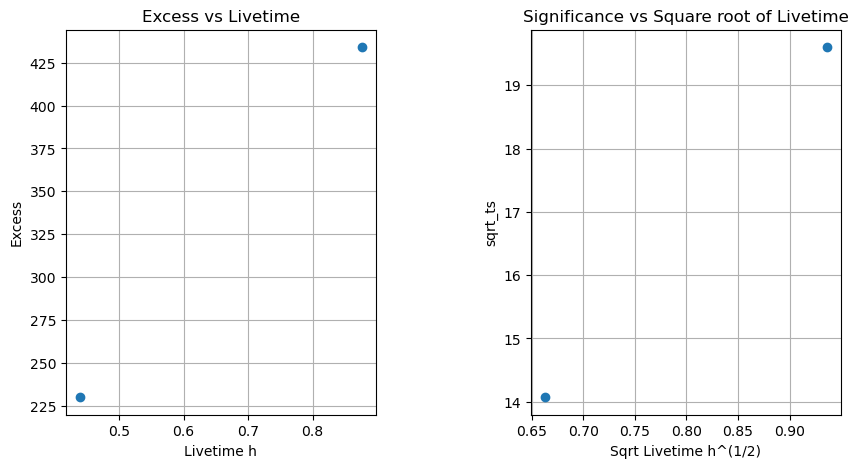

In [43]:
# Plot temporal evolution of excess events and significance value
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(info_table["livetime"].to("h"), info_table["excess"], marker="o", ls="none")
plt.plot(info_table["livetime"].to("h")[-1:1], info_table["excess"][-1:1], "r")
plt.xlabel("Livetime h")
plt.ylabel("Excess")
plt.grid()
plt.title("Excess vs Livetime")

plt.subplot(122)
plt.plot(
    np.sqrt(info_table["livetime"].to("h")),
    info_table["sqrt_ts"],
    marker="o",
    ls="none",
)
plt.grid()
plt.xlabel("Sqrt Livetime h^(1/2)")
plt.ylabel("sqrt_ts")
plt.title("Significance vs Square root of Livetime")
plt.subplots_adjust(wspace=0.5)

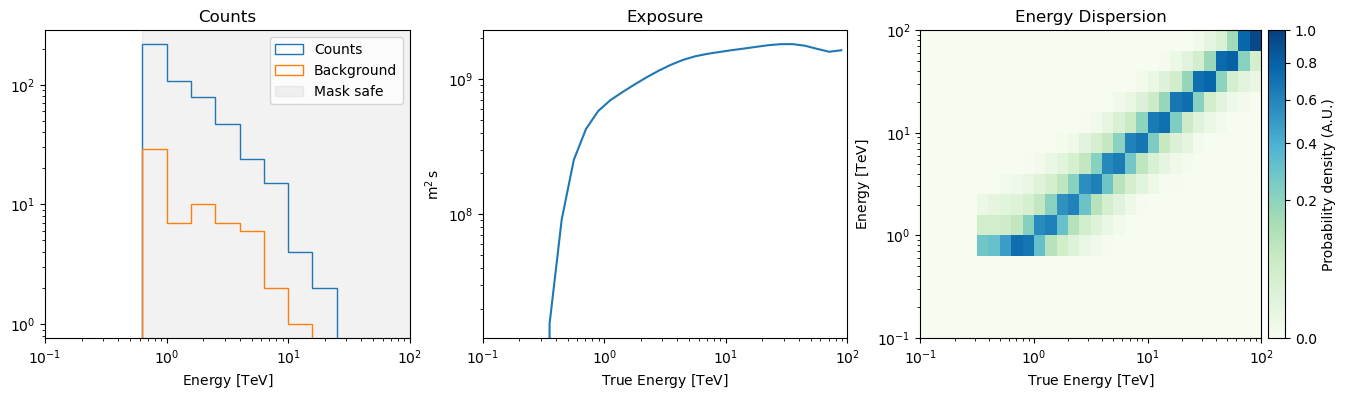

In [44]:
stacked_dataset.peek()